In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from utils import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'df67931489f44a6bb952149deb53bede')

In [ ]:
search_images_bing

In [3]:
b_types = 'succulent','cactus','tree'
path = Path('b_types')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in b_types:
        dest = path/o
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:

if not path.exists():
    path.mkdir()
    i = 0
    for o in b_types:
        i= i+1
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        imgs_urls = search_images_bing_many(key, f'{o}', total_count=900)
        download_images(dest, urls=imgs_urls)


In [8]:
fns = get_image_files(path)
fns

(#1696) [Path('b_types/cactus/00000000.jpg'),Path('b_types/cactus/00000001.jpg'),Path('b_types/cactus/00000002.jpg'),Path('b_types/cactus/00000004.jpg'),Path('b_types/cactus/00000005.jpg'),Path('b_types/cactus/00000006.jpg'),Path('b_types/cactus/00000007.jpg'),Path('b_types/cactus/00000009.jpg'),Path('b_types/cactus/00000010.JPG'),Path('b_types/cactus/00000011.jpg')...]

In [4]:
# 손상된 이미지 점검
failed = verify_images(fns)
failed

NameError: name 'fns' is not defined

In [ ]:
# 실패한 모든 이미지 제거
failed.map(Path.unlink);

In [7]:
DATALOADER.NUM_WORKERS =0

NameError: name 'DATALOADER' is not defined

In [25]:
bears = DataBlock(
    # 독립 변수, 종속 변수 지정
    blocks=(ImageBlock, CategoryBlock), 
    
    # 파일 경로 제공
    get_items=get_image_files, 
    
    # 데이터 분할: train, valid
    splitter=RandomSplitter(valid_pct=0.2, seed=16),
    
    # label 지정하기(이 경우, 폴더 명)
    get_y=parent_label,
    
    # mini-batch: 여러 이미지 묶음, 배열을 그룹화하기 위한 크기 맞추는 조치, 
    item_tfms=Resize(128))

In [26]:
dls = bears.dataloaders(path)

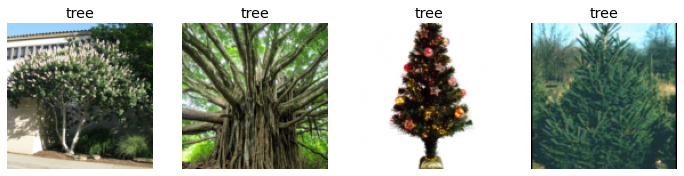

In [27]:
dls.valid.show_batch(max_n=4, nrows=1)

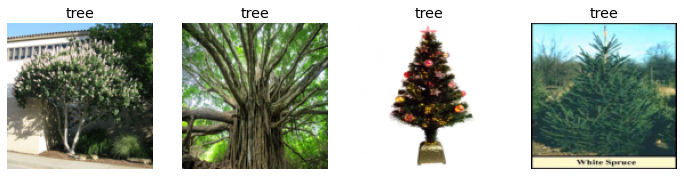

In [28]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

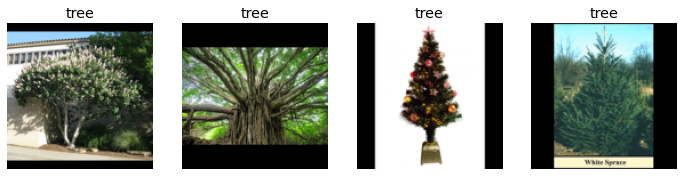

In [29]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

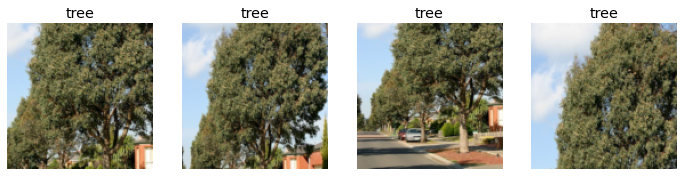

In [30]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

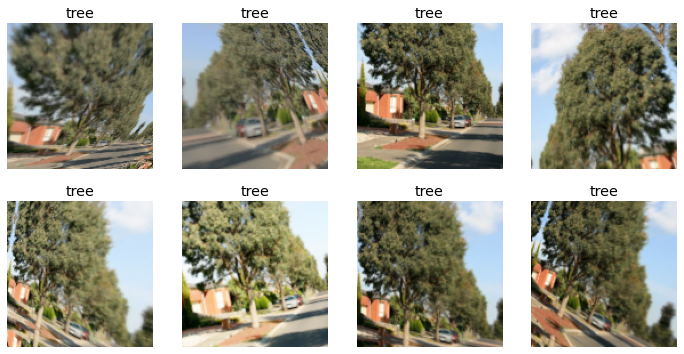

In [31]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [32]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [33]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.958225,0.236765,0.090634,00:12


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/

epoch,train_loss,valid_loss,error_rate,time
0,0.219391,0.103631,0.033233,00:12
1,0.150683,0.083331,0.027190,00:12
2,0.108854,0.065846,0.018127,00:12


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


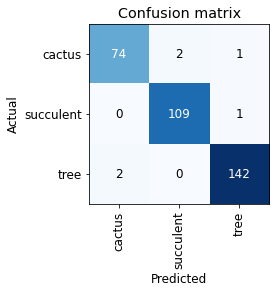

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

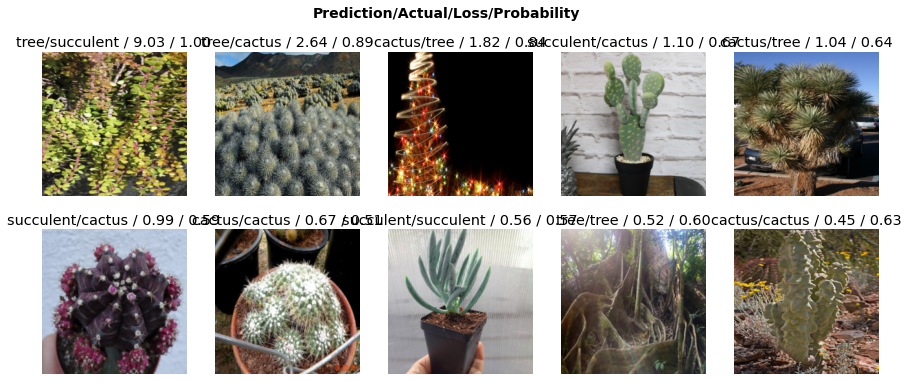

In [35]:
interp.plot_top_losses(10, nrows=2)
# loss값이 높은 순서대로 정렬: 예측/실제(label)/loss/probability

In [16]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 12 bytes but only got 10. Skipping tag 42037
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [36]:
learn.export()

In [37]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]